In [1]:
"""Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload."""

'Template for jupyter notebooks created within this directory. Adds the parent directory to path and sets autoreload.'

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(cwd)

# Get the grandparent directory (two levels above)
root_dir = os.path.dirname(parent_dir)

# Add the root directory to sys.path
if root_dir not in sys.path:
    sys.path.append(root_dir)

print(f"Root directory: {root_dir} is added to sys.path")


Root directory: /Users/aag/Documents/proteinfolding is added to sys.path


In [3]:
from proteinfolding import * ## should run without errors
from proteinfolding.paths import EXACT_DATA_ENERGY_BITSTRING_FILE

##TODO: proper testing ##

In [30]:
from proteinfolding.data_processing import *
from proteinfolding.paths import XY_QAOA_DATA_DIR, XY_QAOA_PLOTS_HYPERPARAMETER_ANALYSIS

# SIMULATION_IDS = ["A120221", "A124099", "A124866", "A124770", "A124650"]
SIMULATION_IDS = ["A120221", "A124099", "A124866", "A124770", "A124650", "A119059", "A119249"]
# SIMULATION_IDS = ["A120221", "A124099", "A124866", "A124770", "A124650", "A119059"]
# SIMULATION_IDS = ["A124099", "A124866", "A124770"]

all_dfs = []

n_reps = 7

PROCESSED_DATA_DIR = os.path.join(XY_QAOA_DATA_DIR, SIMULATION_IDS[0], f"{n_reps}_reps")
PLOT_DIR = os.path.join(XY_QAOA_PLOTS_HYPERPARAMETER_ANALYSIS, SIMULATION_IDS[0], f"{n_reps}_reps")

print(f"Processed Data Directory: {PROCESSED_DATA_DIR}")
print(f"Processed Plot Directory: {PLOT_DIR}")

Processed Data Directory: /Users/aag/Documents/proteinfolding/data/processed/xy_qaoa/A120221/7_reps
Processed Plot Directory: /Users/aag/Documents/proteinfolding/plots/xy_qaoa/hyperparameter_analysis/A120221/7_reps


In [31]:
#### MULTIPLE SIMULATIONS ####
import pandas as pd
from proteinfolding.paths import XY_QAOA_DATA_DIR, MIN_SHOTS_TO_FIND_GS_FILE

for sim_id in SIMULATION_IDS:
    sim_data_path = os.path.join(XY_QAOA_DATA_DIR, sim_id)
    df_min_shots_path = os.path.join(sim_data_path, MIN_SHOTS_TO_FIND_GS_FILE)

    df = pd.read_csv(os.path.join(sim_data_path, f"{sim_id}.csv.gz"), compression="gzip")   
    df_min_shots = pd.read_csv(df_min_shots_path)

    df_min_shots["simulation_id"] = sim_id
    all_dfs.append(df_min_shots)

In [32]:
df_min_shots_combined = pd.concat(all_dfs, ignore_index=True)

print(f"Loaded {len(df_min_shots_combined)} entries from {len(SIMULATION_IDS)} simulations.")


Loaded 198 entries from 7 simulations.


In [33]:
# save the data
from proteinfolding.paths import MIN_SHOTS_TO_FIND_GS_FILE

if not os.path.exists(PROCESSED_DATA_DIR):
    os.makedirs(PROCESSED_DATA_DIR)

df_min_shots_combined.to_csv(os.path.join(PROCESSED_DATA_DIR, MIN_SHOTS_TO_FIND_GS_FILE), index=False)

In [34]:
df_min_shots_combined.keys()

Index(['num_res', 'num_rot', 'num_qubits', 'alpha', 'p', 'min_iter', 'shots',
       'min_shots', 'simulation_id'],
      dtype='object')

In [35]:
df_min_shots_combined.head()

,num_res,num_rot,num_qubits,alpha,p,min_iter,shots,min_shots,simulation_id
0,4,4,16,0.2,1,6,1000,6000,A120221
1,4,4,16,0.2,2,1,1000,1000,A120221
2,4,4,16,0.2,3,1,1000,1000,A120221
3,4,4,16,0.2,4,3,1000,3000,A120221
4,4,4,16,0.2,5,2,1000,2000,A120221


In [36]:
print(df_min_shots_combined)

     num_res  num_rot  num_qubits  alpha  p  min_iter  shots  min_shots  \
0          4        4          16    0.2  1         6   1000       6000   
1          4        4          16    0.2  2         1   1000       1000   
2          4        4          16    0.2  3         1   1000       1000   
3          4        4          16    0.2  4         3   1000       3000   
4          4        4          16    0.2  5         2   1000       2000   
..       ...      ...         ...    ... ..       ...    ...        ...   
193        7        3          21    0.2  5         2   1000       2000   
194        8        3          24    0.2  1         6   1000       6000   
195        8        3          24    0.2  2        10   1000      10000   
196        8        3          24    0.2  3        17   1000      17000   
197        8        3          24    0.2  4        16   1000      16000   

    simulation_id  
0         A120221  
1         A120221  
2         A120221  
3         A120221  

In [37]:
df_min_shots_combined = df_min_shots_combined.dropna()

In [38]:
df_min_shots_combined_no_outliers = df_min_shots_combined[~((df_min_shots_combined['num_qubits'] == 21) & (df_min_shots_combined['p'] == 3))]
print(df_min_shots_combined_no_outliers)

     num_res  num_rot  num_qubits  alpha  p  min_iter  shots  min_shots  \
0          4        4          16    0.2  1         6   1000       6000   
1          4        4          16    0.2  2         1   1000       1000   
2          4        4          16    0.2  3         1   1000       1000   
3          4        4          16    0.2  4         3   1000       3000   
4          4        4          16    0.2  5         2   1000       2000   
..       ...      ...         ...    ... ..       ...    ...        ...   
193        7        3          21    0.2  5         2   1000       2000   
194        8        3          24    0.2  1         6   1000       6000   
195        8        3          24    0.2  2        10   1000      10000   
196        8        3          24    0.2  3        17   1000      17000   
197        8        3          24    0.2  4        16   1000      16000   

    simulation_id  
0         A120221  
1         A120221  
2         A120221  
3         A120221  

In [39]:
df_stats = df_min_shots_combined.groupby(['num_res', 'num_rot', 'p']).agg({
    'min_shots': ['mean', 'std'],
    'min_iter': ['mean', 'std'],
    'shots': ['mean', 'std']
}).reset_index()

df_stats.columns = ['num_res', 'num_rot', 'p', 'min_shots_mean', 'min_shots_std', 
                    'min_iter_mean', 'min_iter_std', 'shots_mean', 'shots_std']

best_combinations = df_stats.loc[df_stats.groupby(['num_res', 'num_rot'])['min_shots_mean'].idxmin()]

print("Best Combinations (with statistics):\n", best_combinations)


Best Combinations (with statistics):
     num_res  num_rot  p  min_shots_mean  min_shots_std  min_iter_mean  \
0         2        2  1     1000.000000            NaN       1.000000   
3         2        3  1     1000.000000            NaN       1.000000   
6         3        2  1     1000.000000            NaN       1.000000   
9         3        3  1     1000.000000            NaN       1.000000   
12        4        2  1     1000.000000            NaN       1.000000   
21        4        3  7       15.000000            NaN       1.000000   
24        4        4  3      805.000000     436.033256       1.000000   
32        4        5  4      600.000000     565.685425       4.500000   
40        5        3  7       40.000000            NaN       2.000000   
47        5        4  7      680.000000     452.548340       9.500000   
53        6        3  6     1333.333333     577.350269       1.333333   
56        6        4  3     2500.000000    1732.050808       1.500000   
62        7  

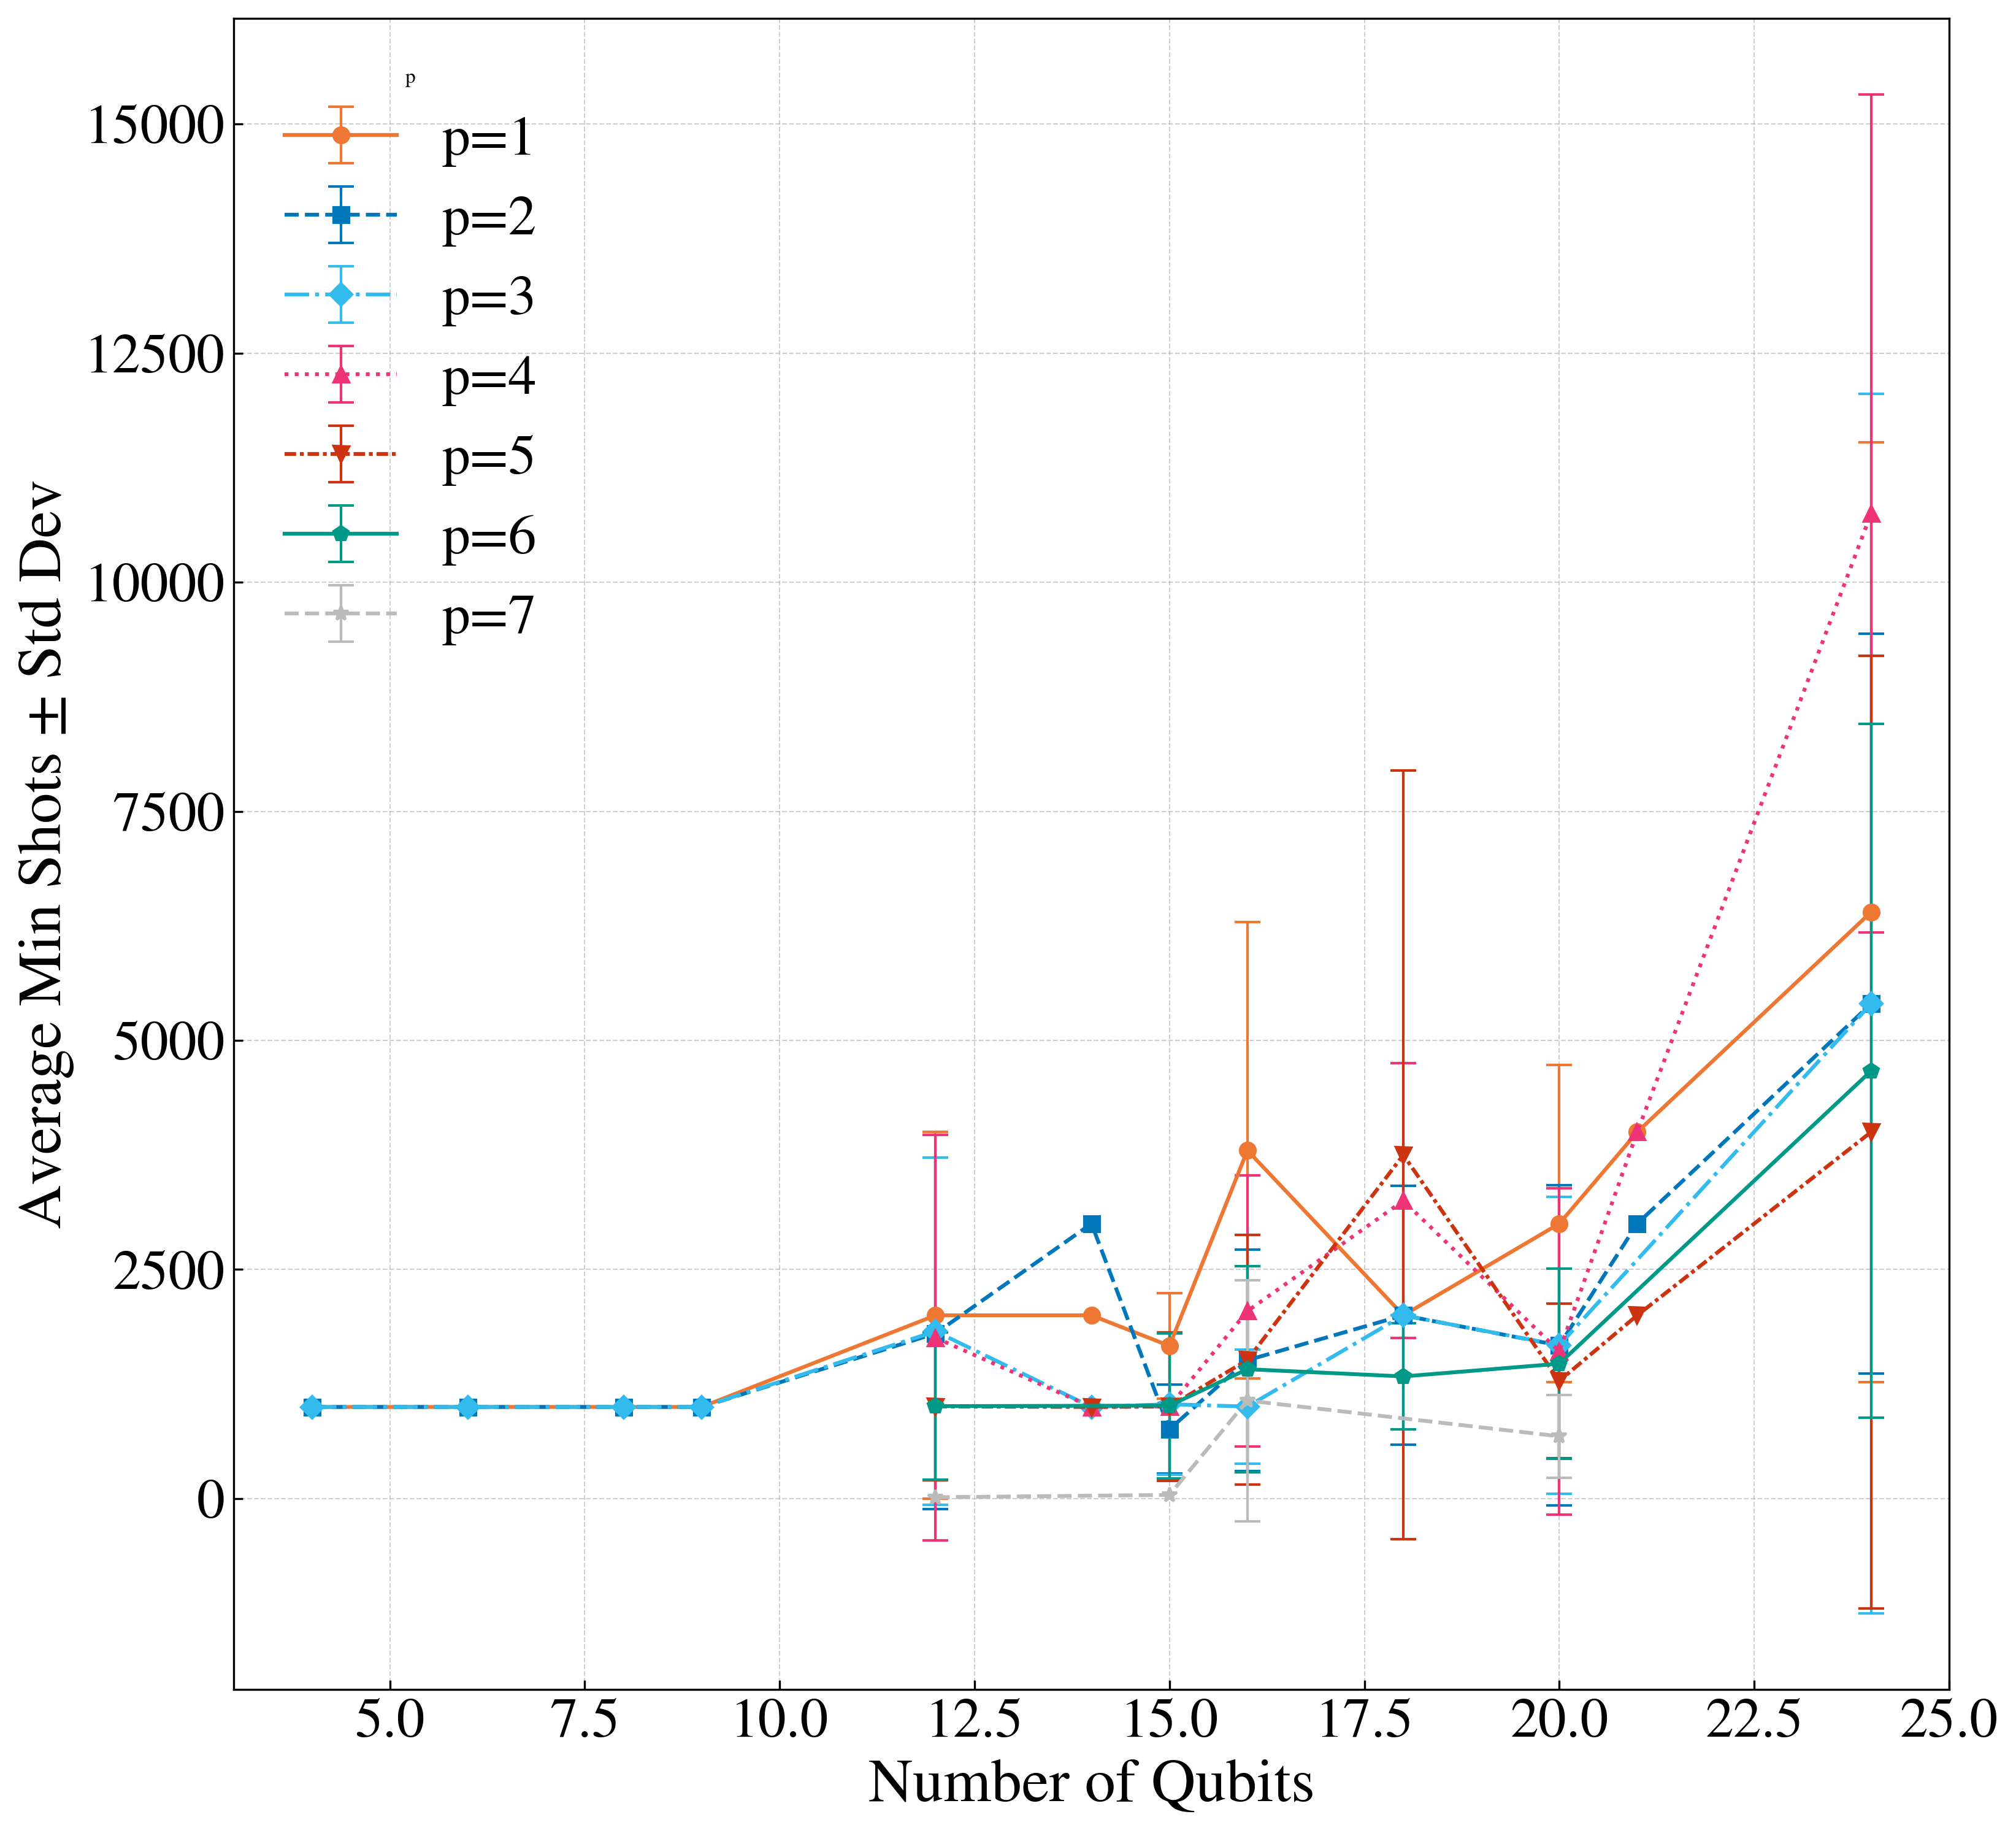

In [40]:
from proteinfolding.data_plotter import DataPlotter

plotter = DataPlotter(df_min_shots_combined_no_outliers)
plotter.plot_min_shots_vs_num_qubits_per_p_statistics(save_path=PLOT_DIR)

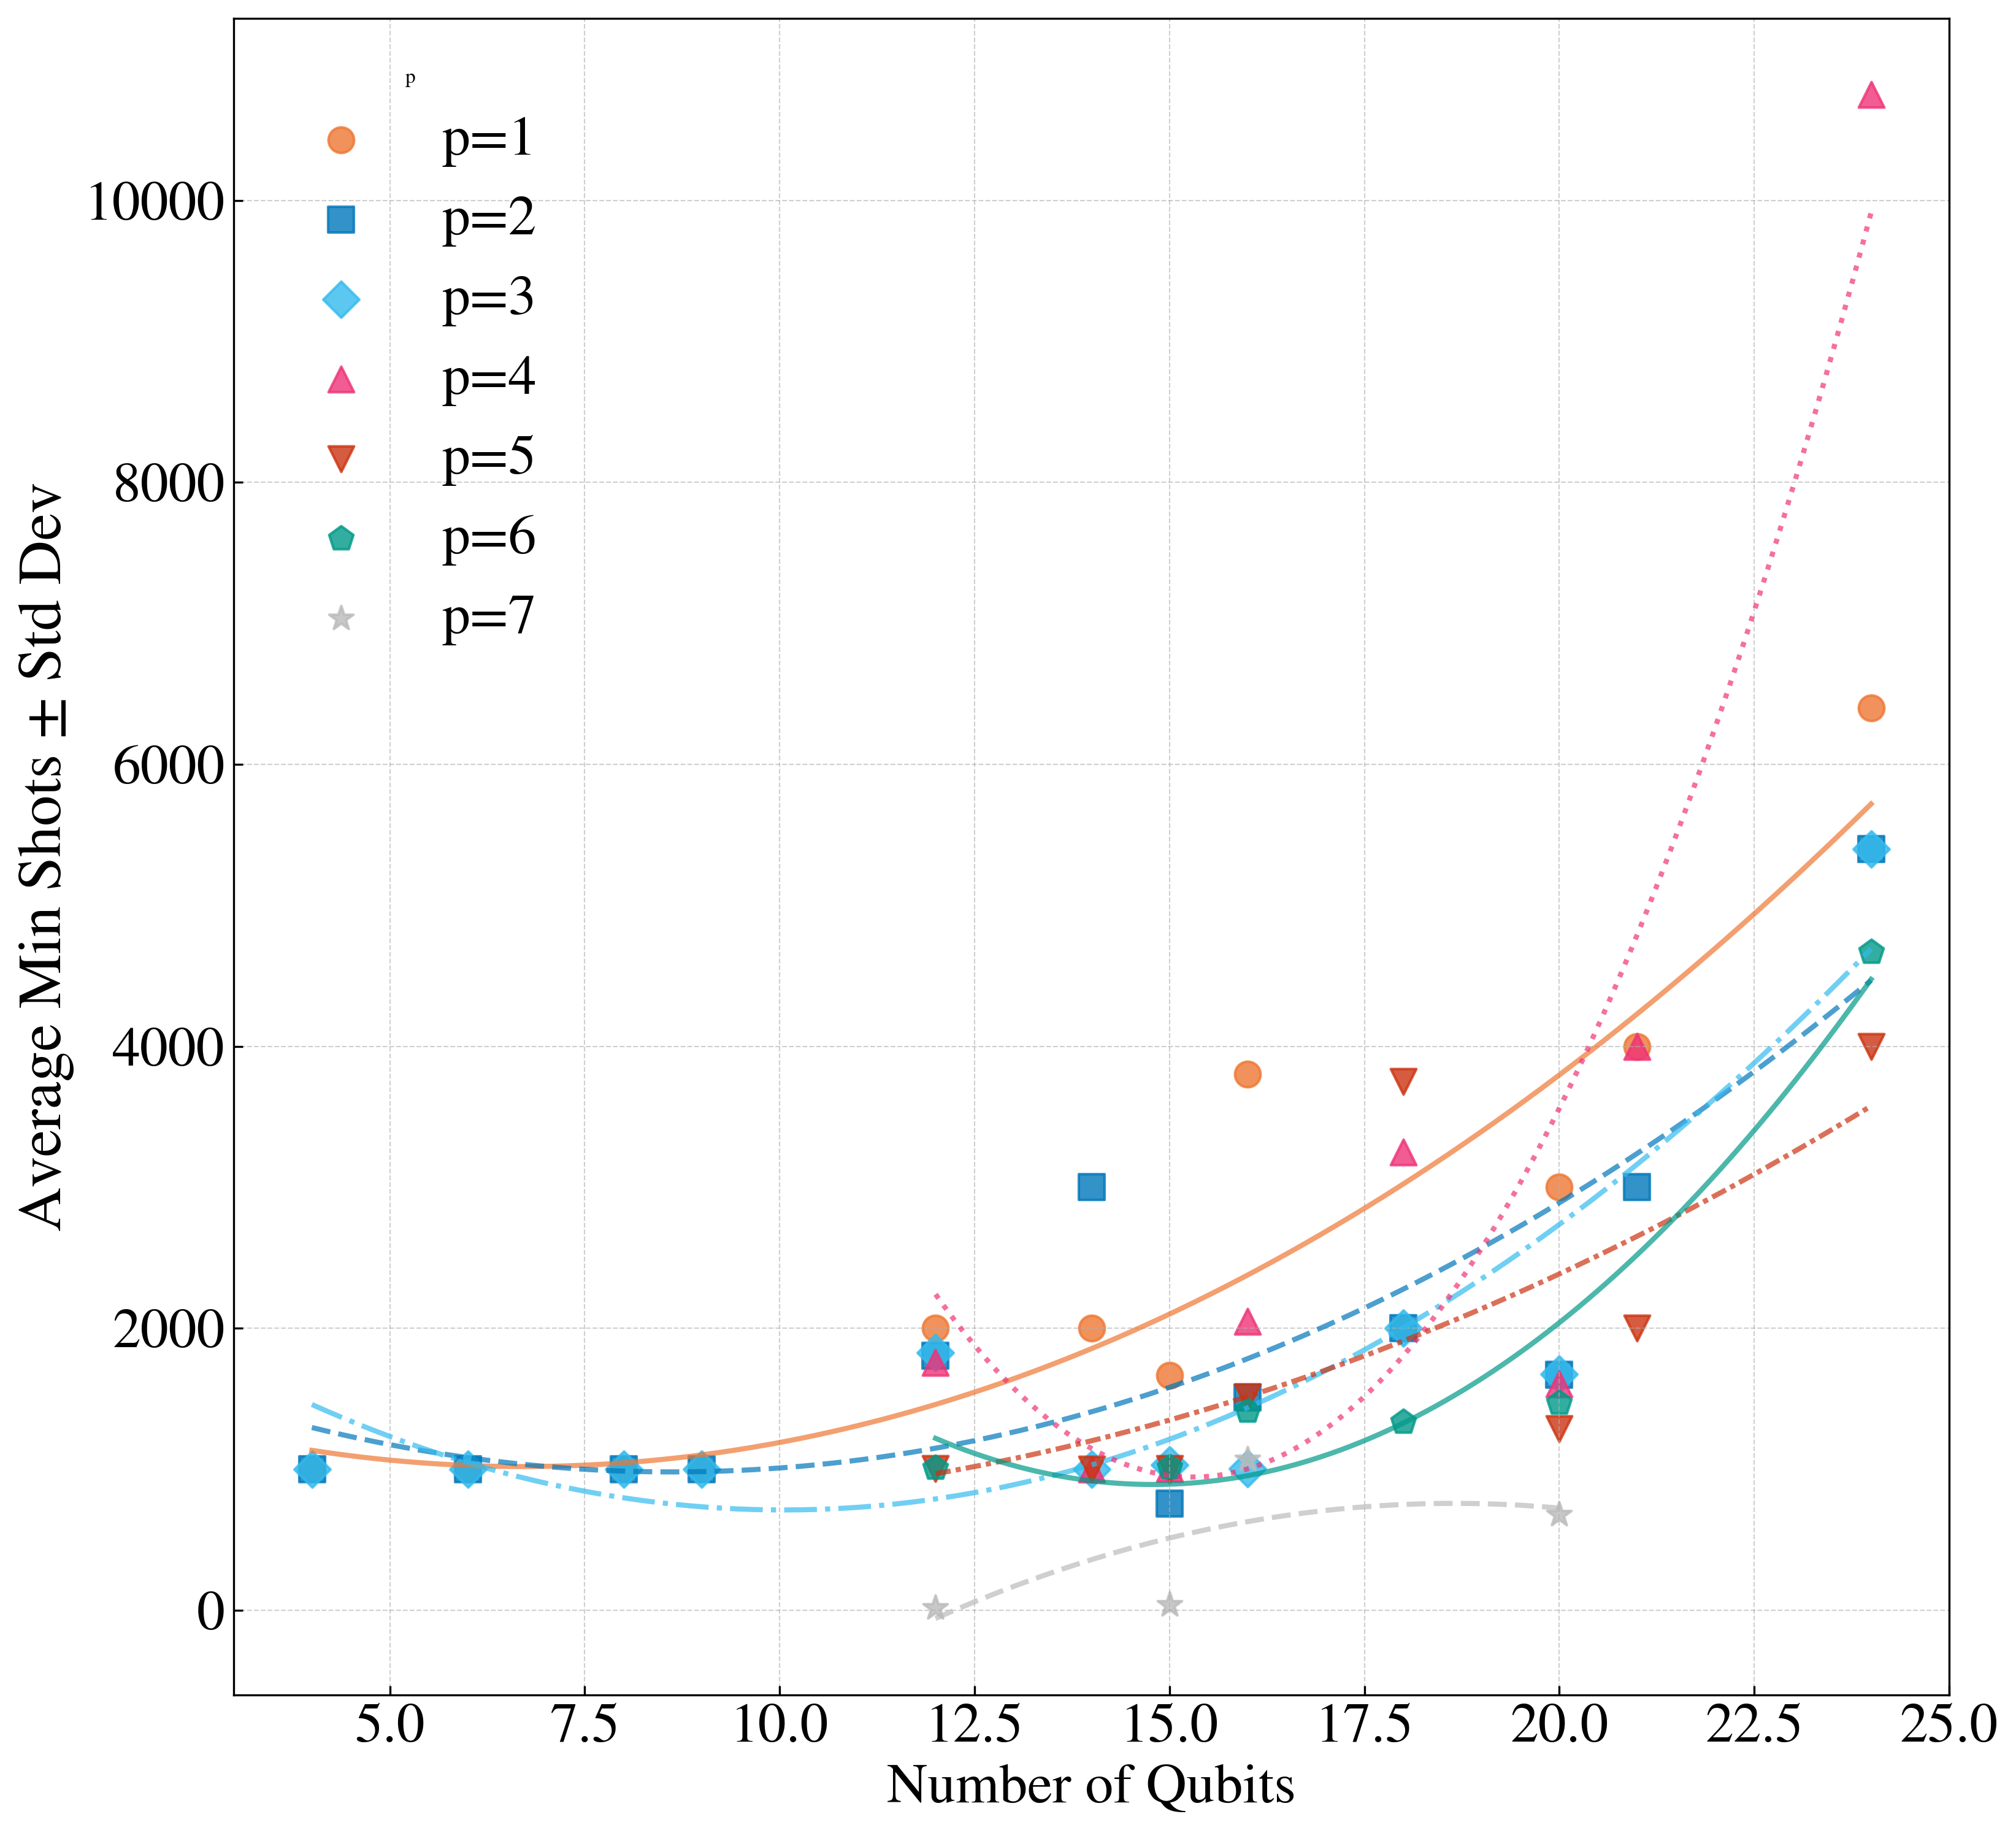

In [41]:
plotter.plot_min_shots_vs_num_qubits_per_p_best_fit(save_path=PLOT_DIR)

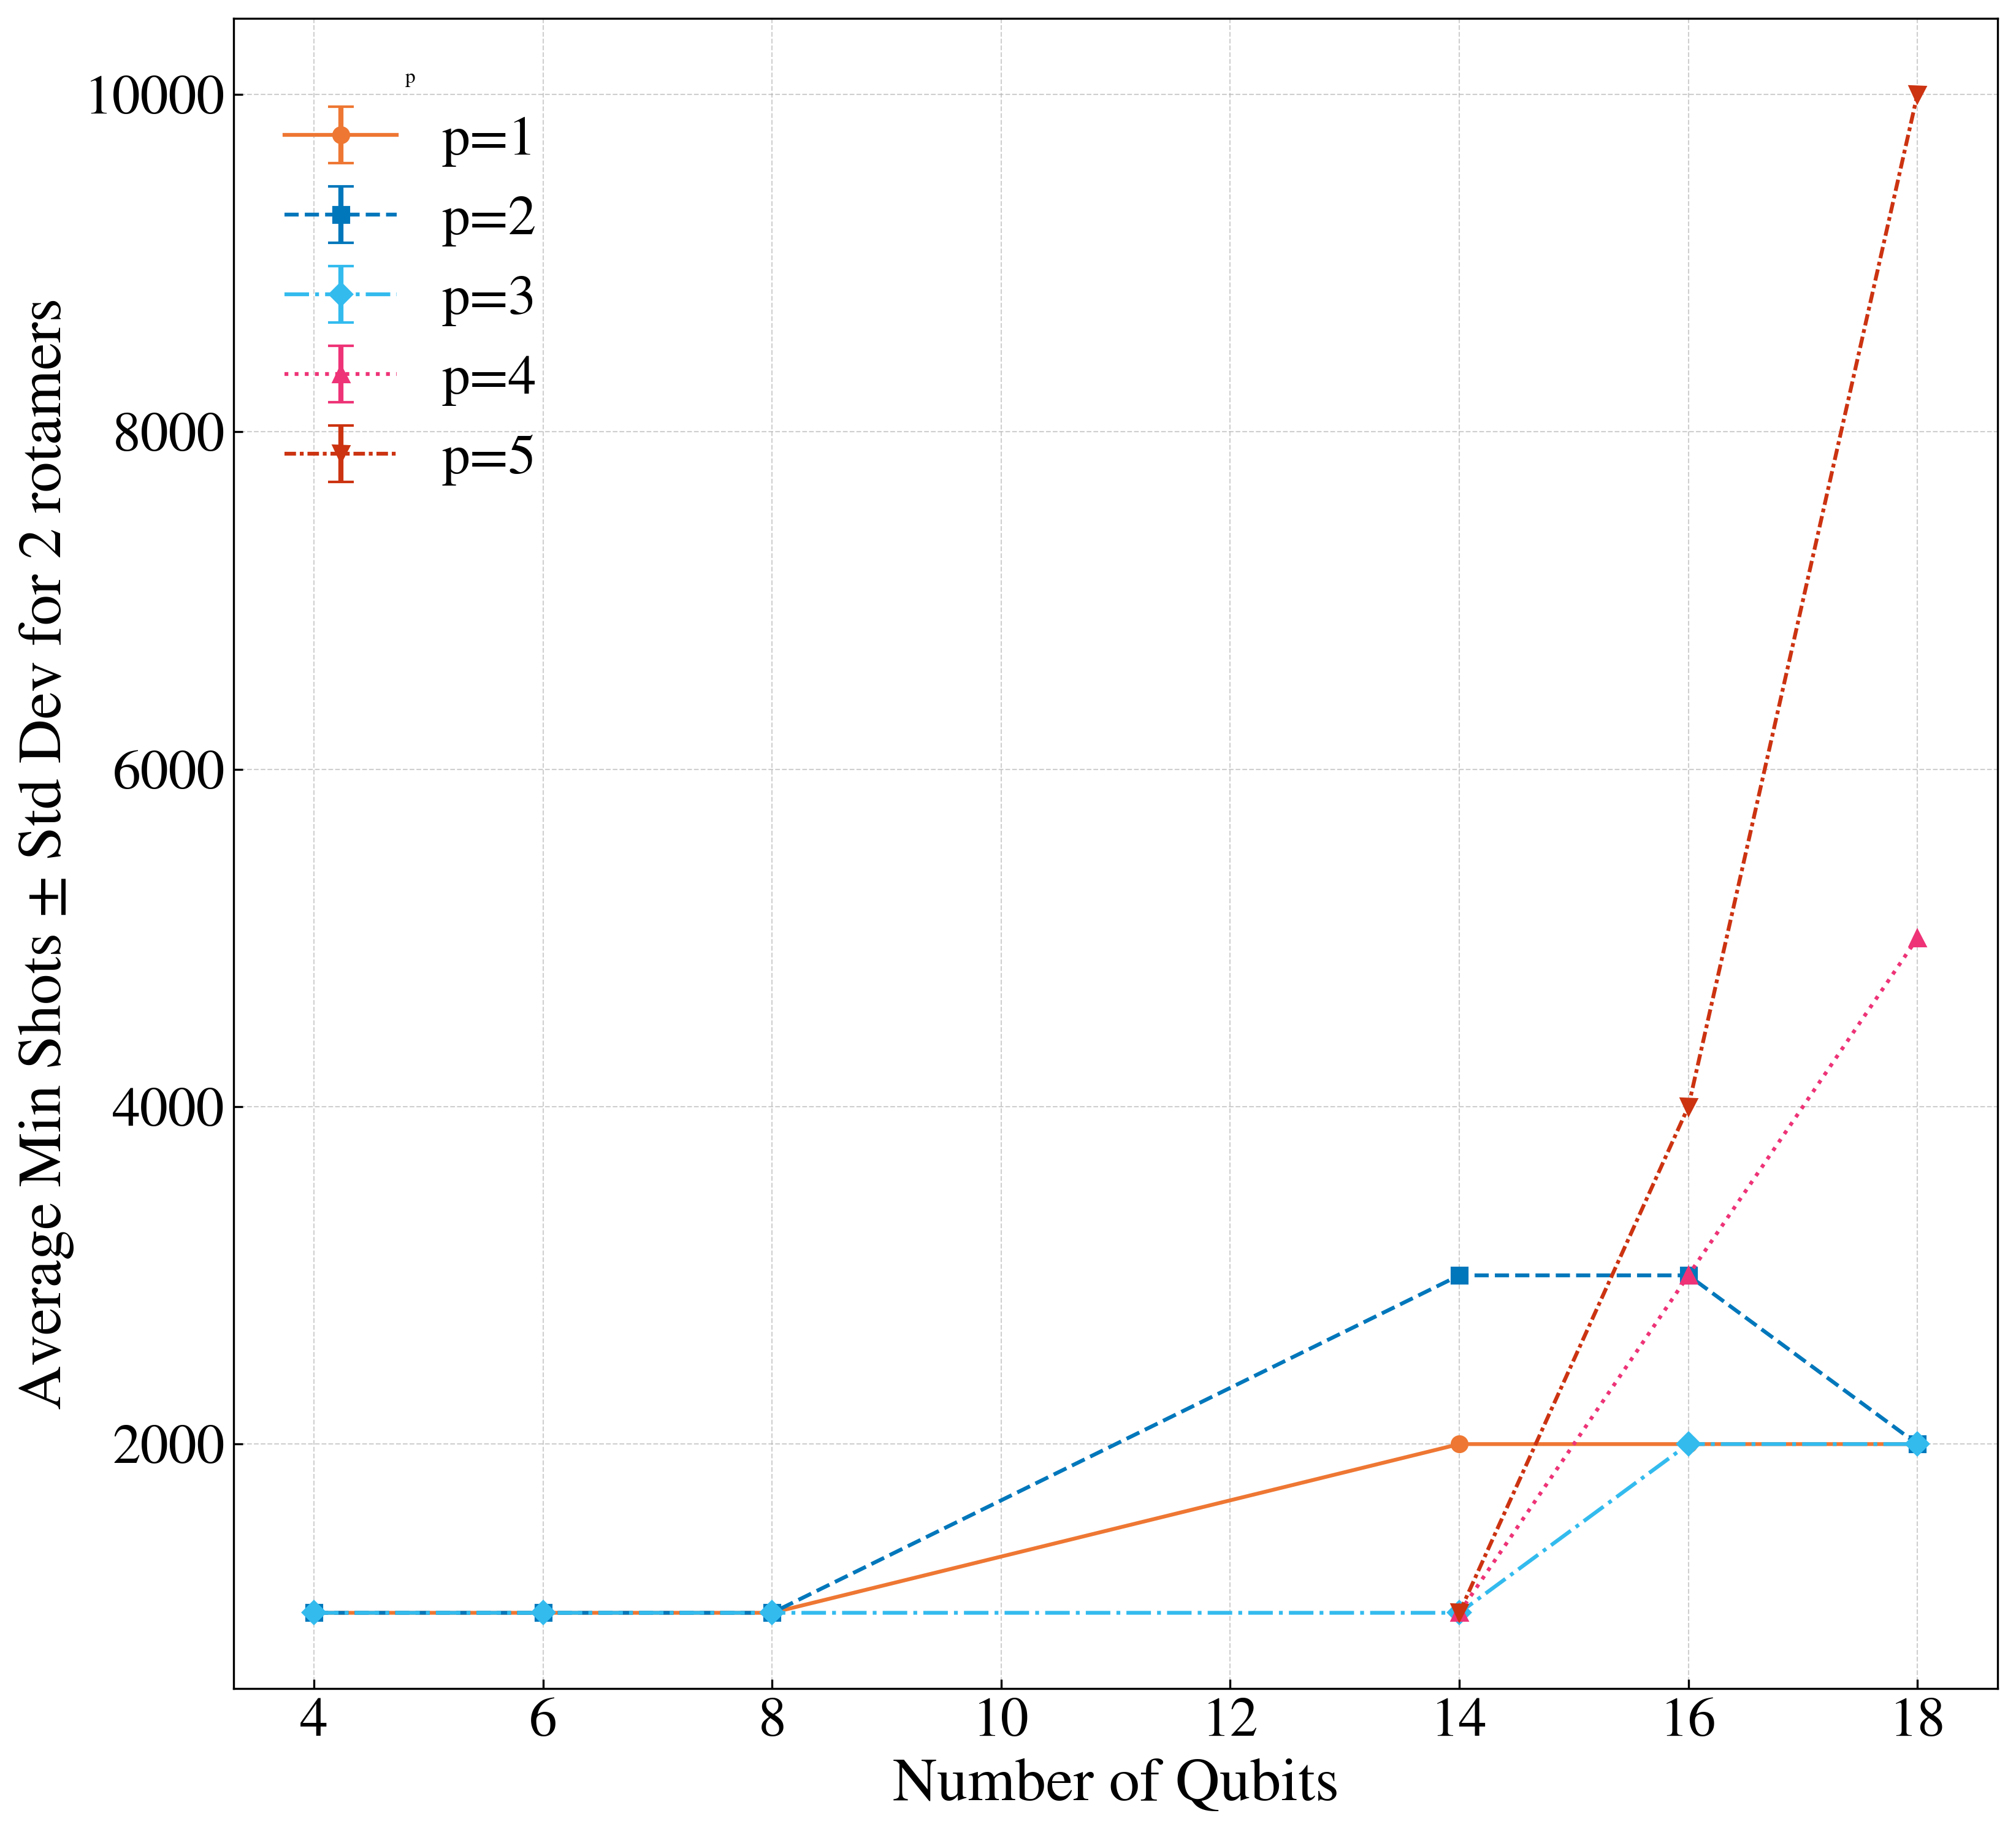

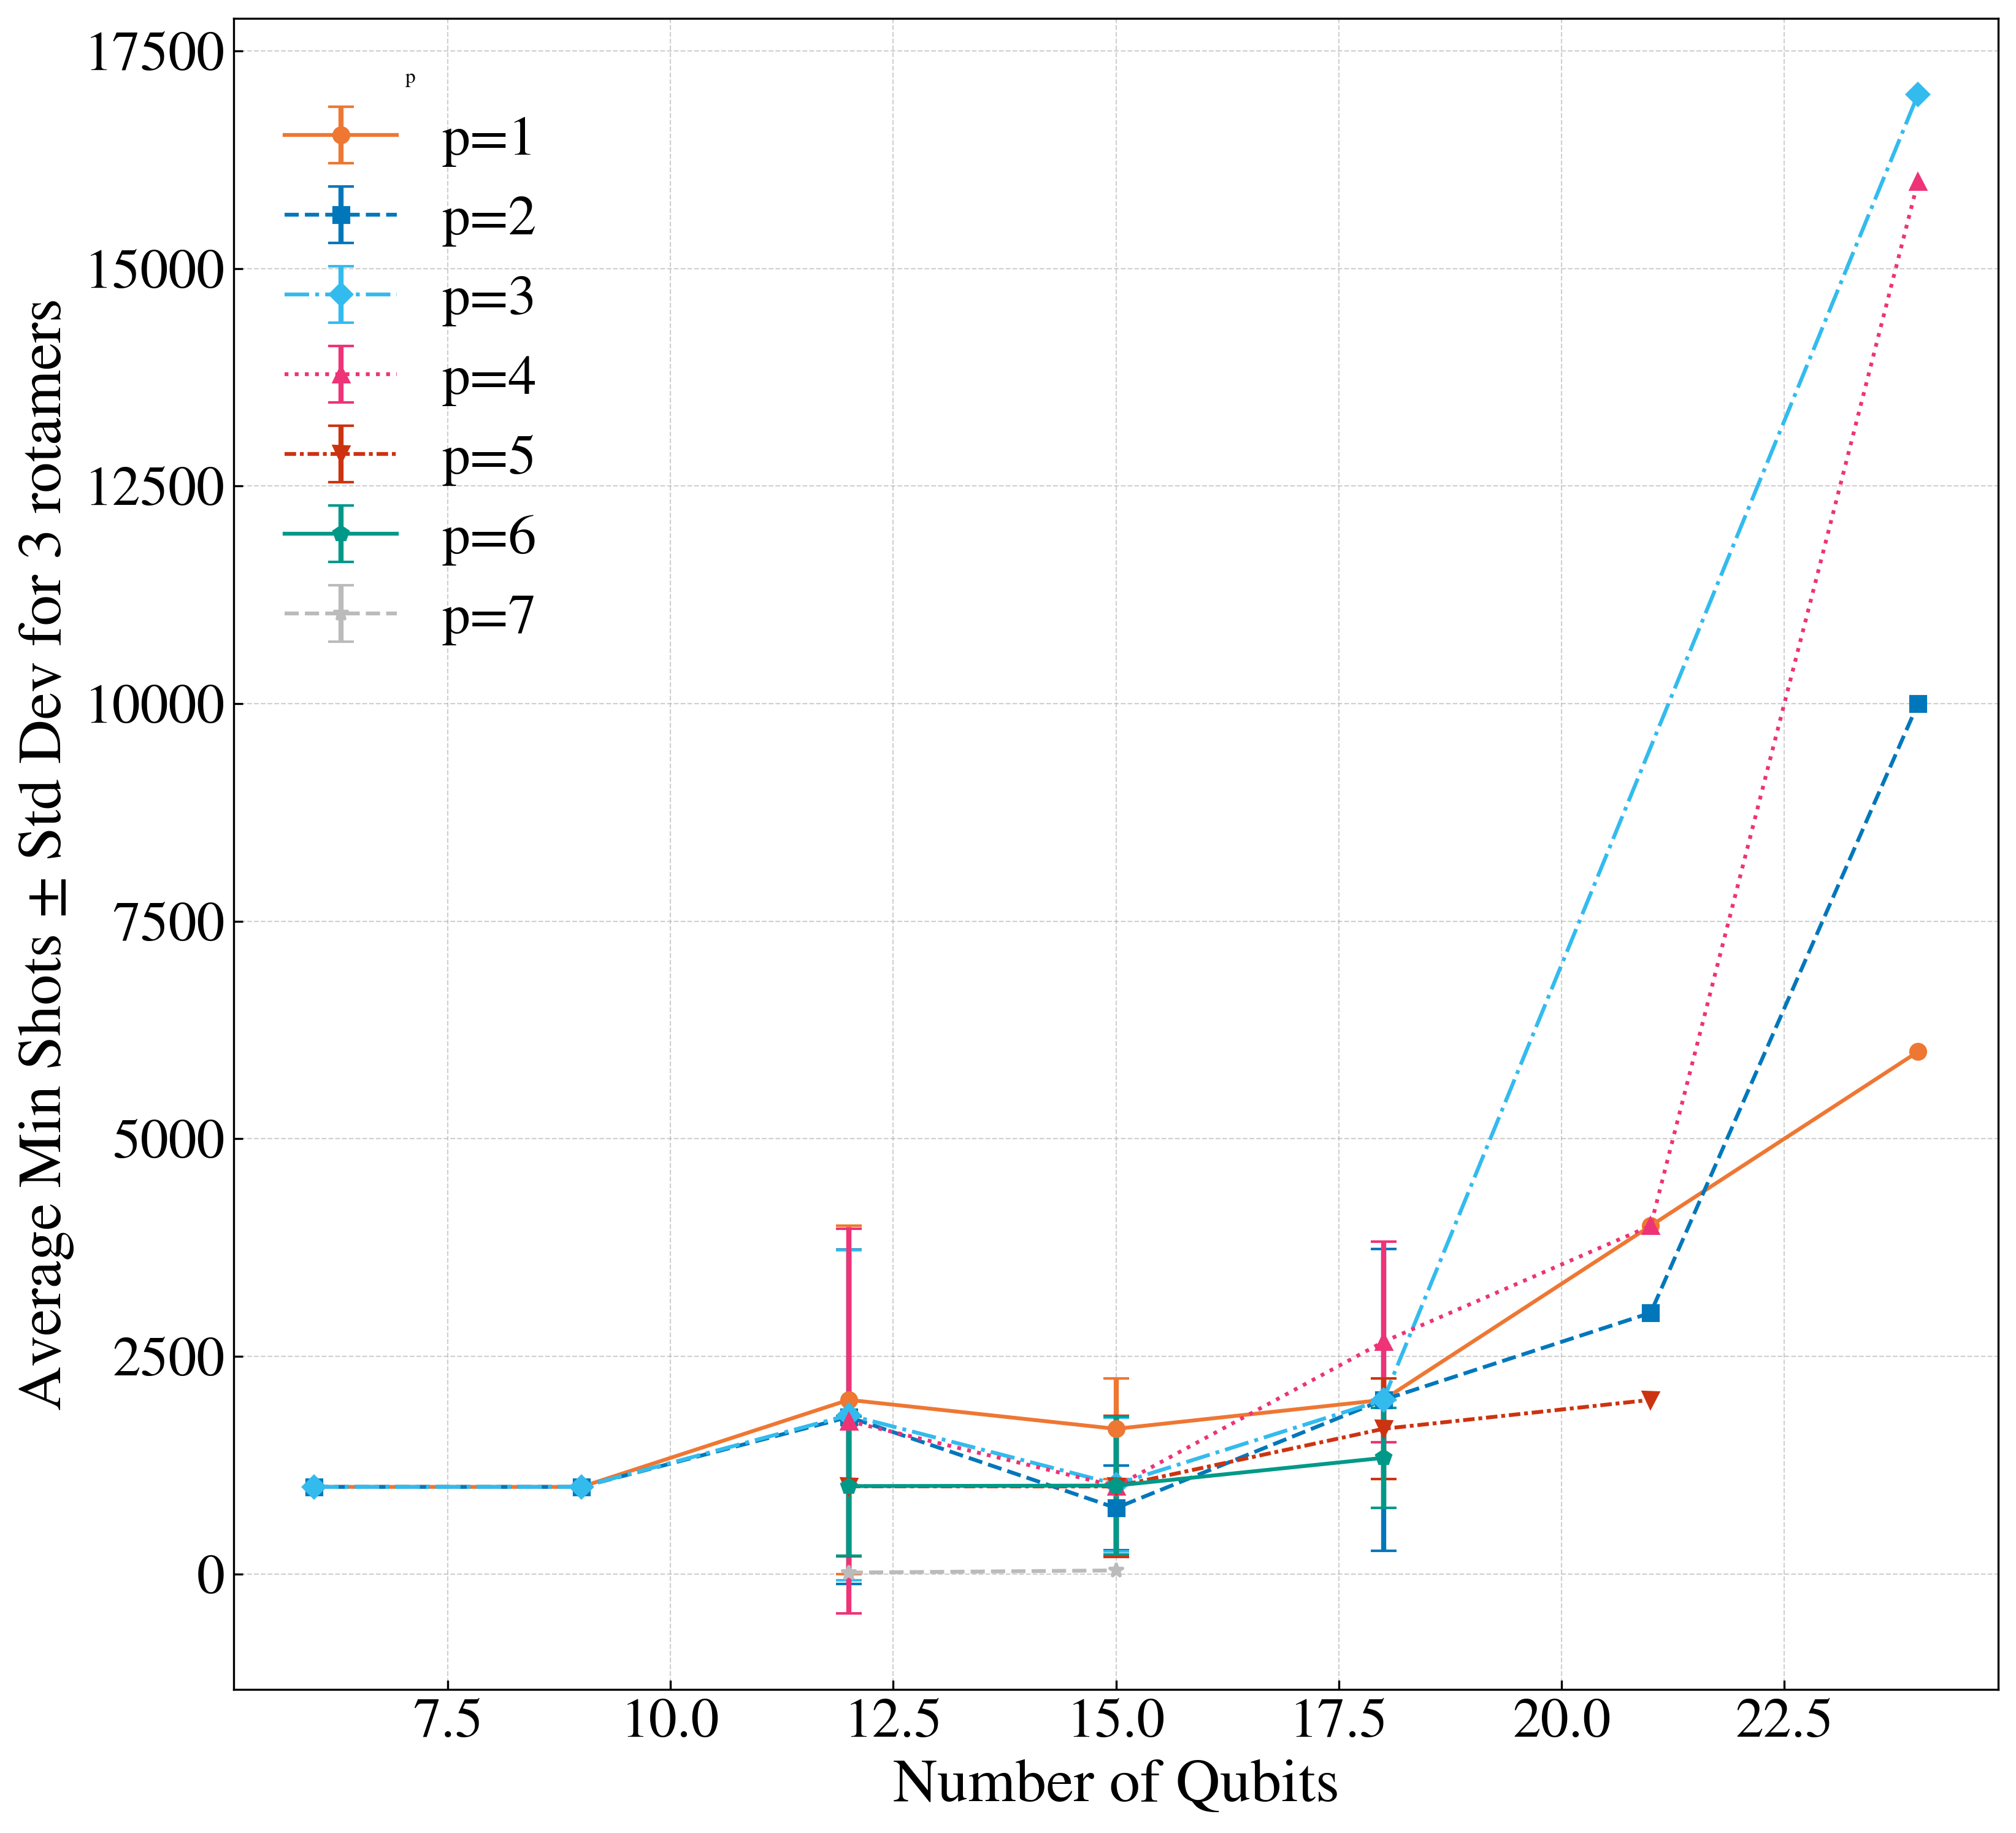

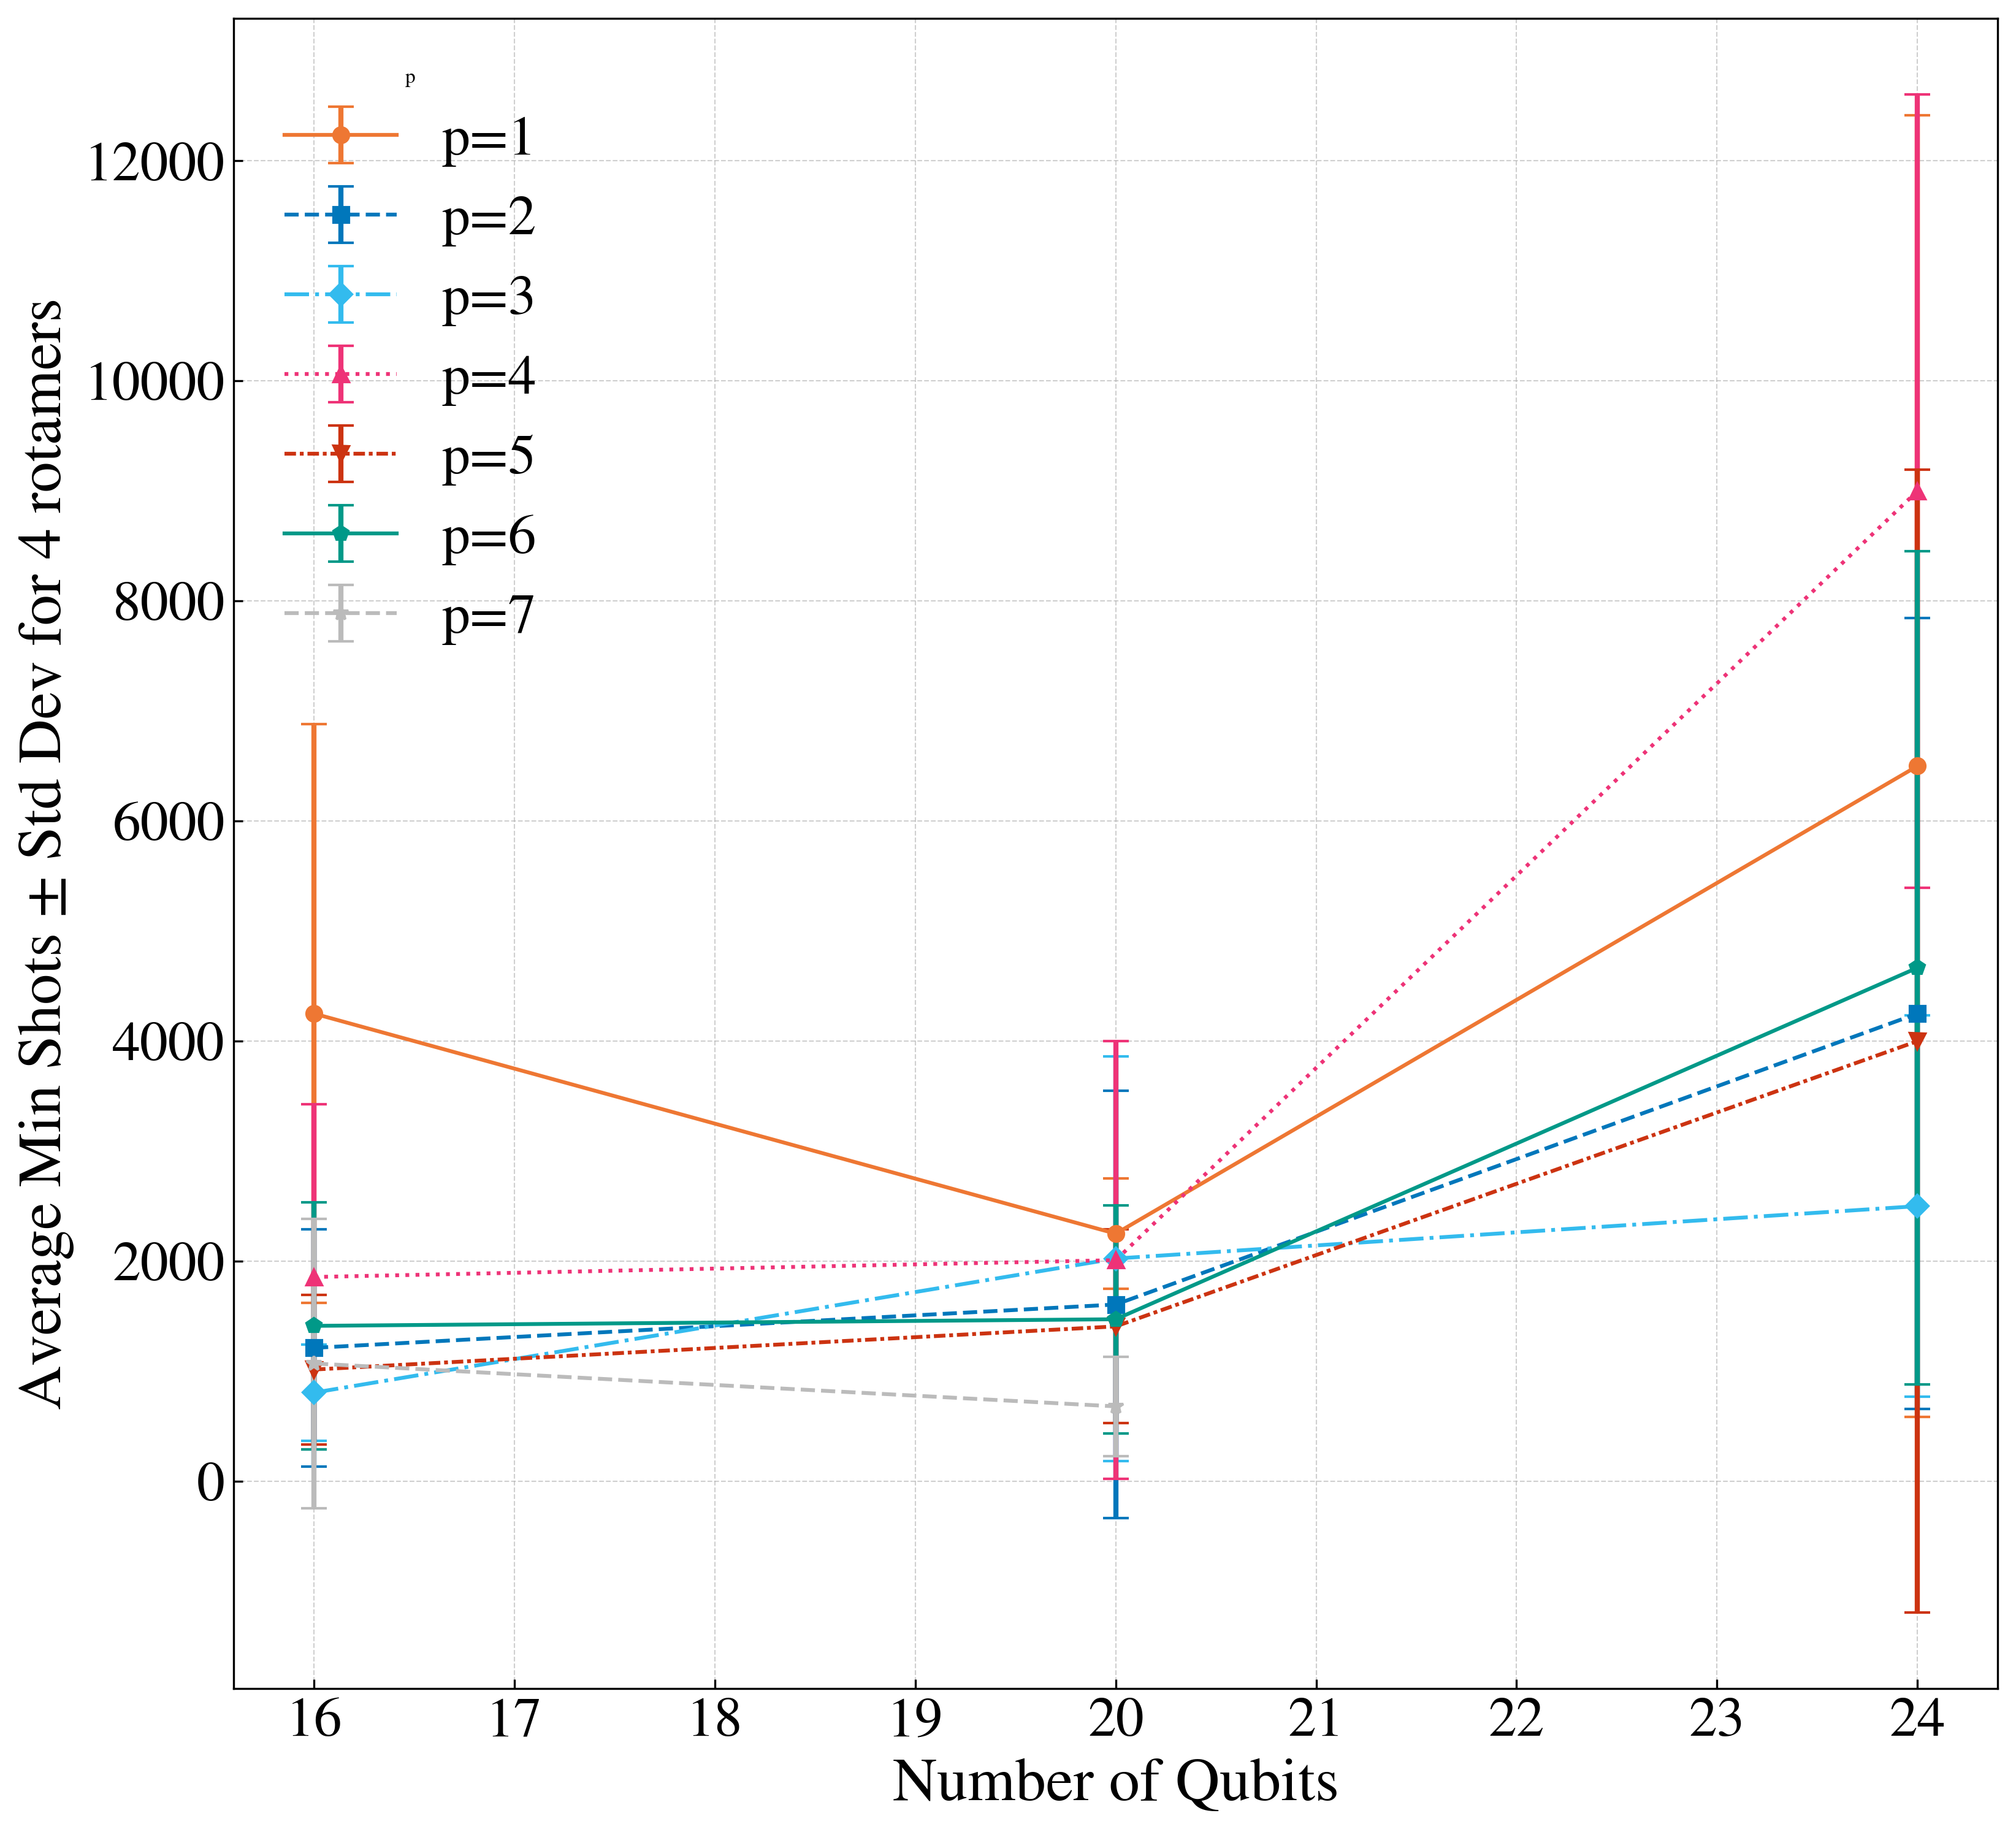

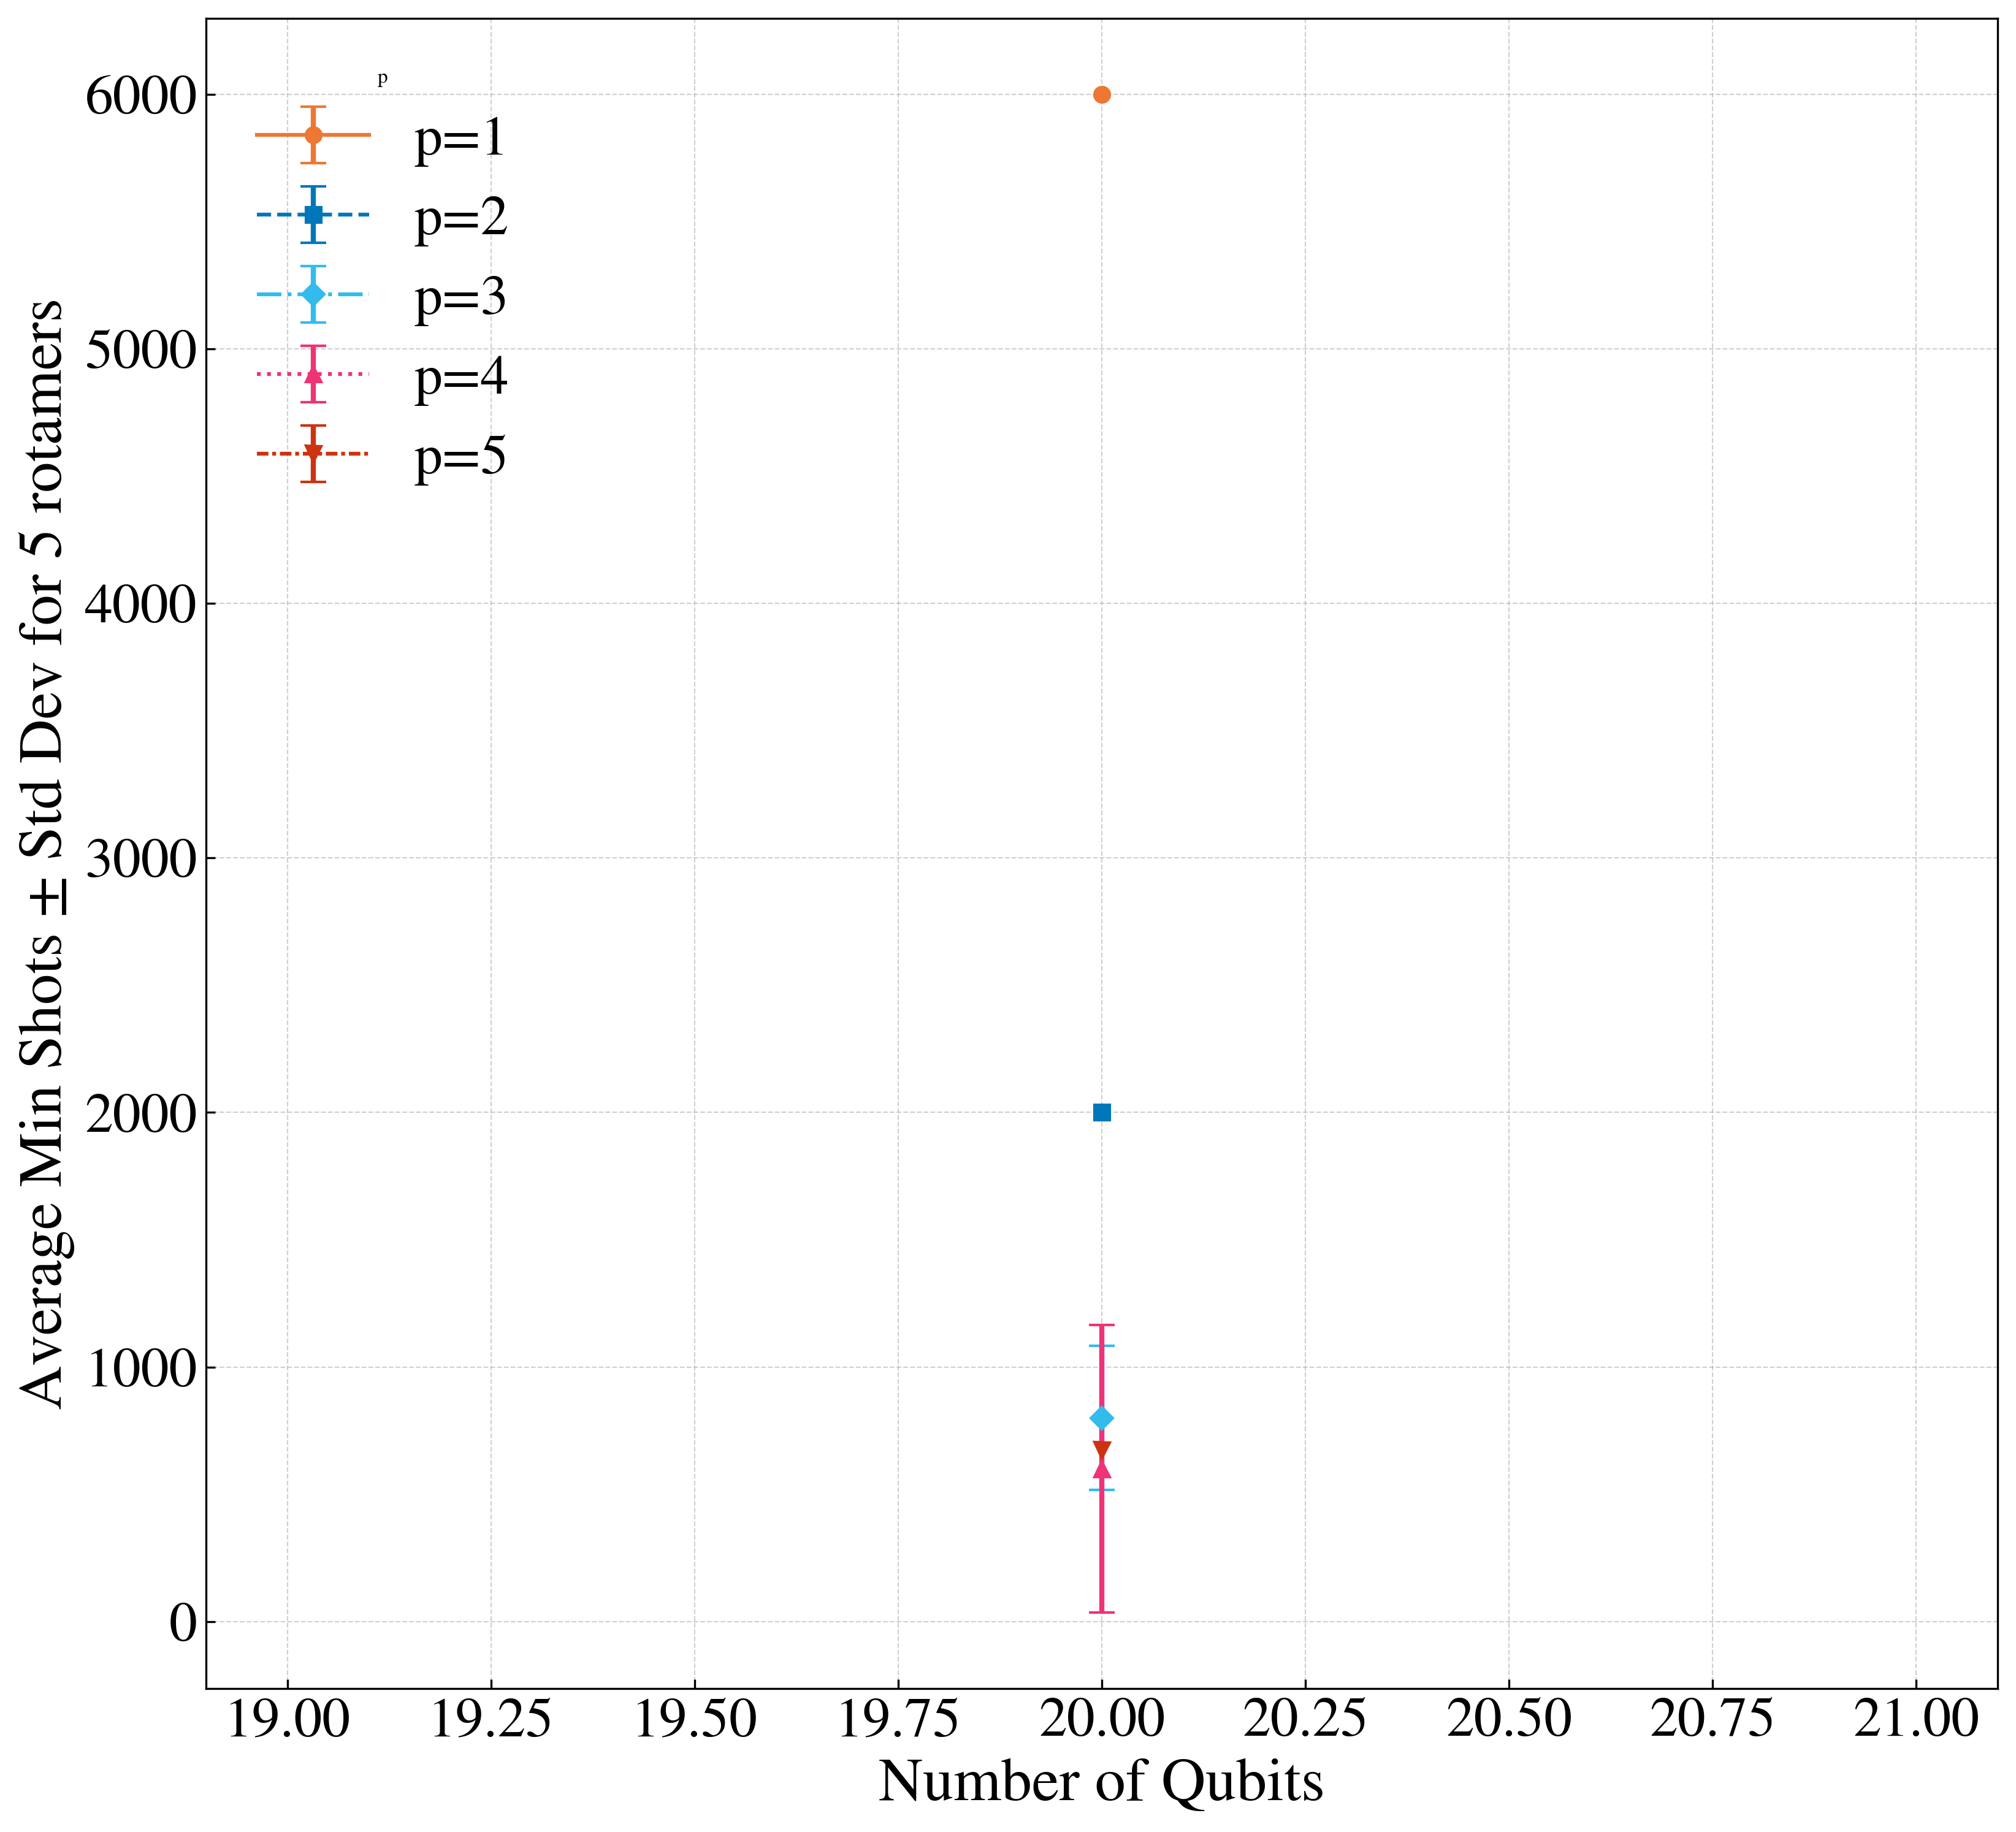

In [42]:
plotter.plot_p_vs_min_shots_per_num_rots_statistics(save_path=PLOT_DIR)

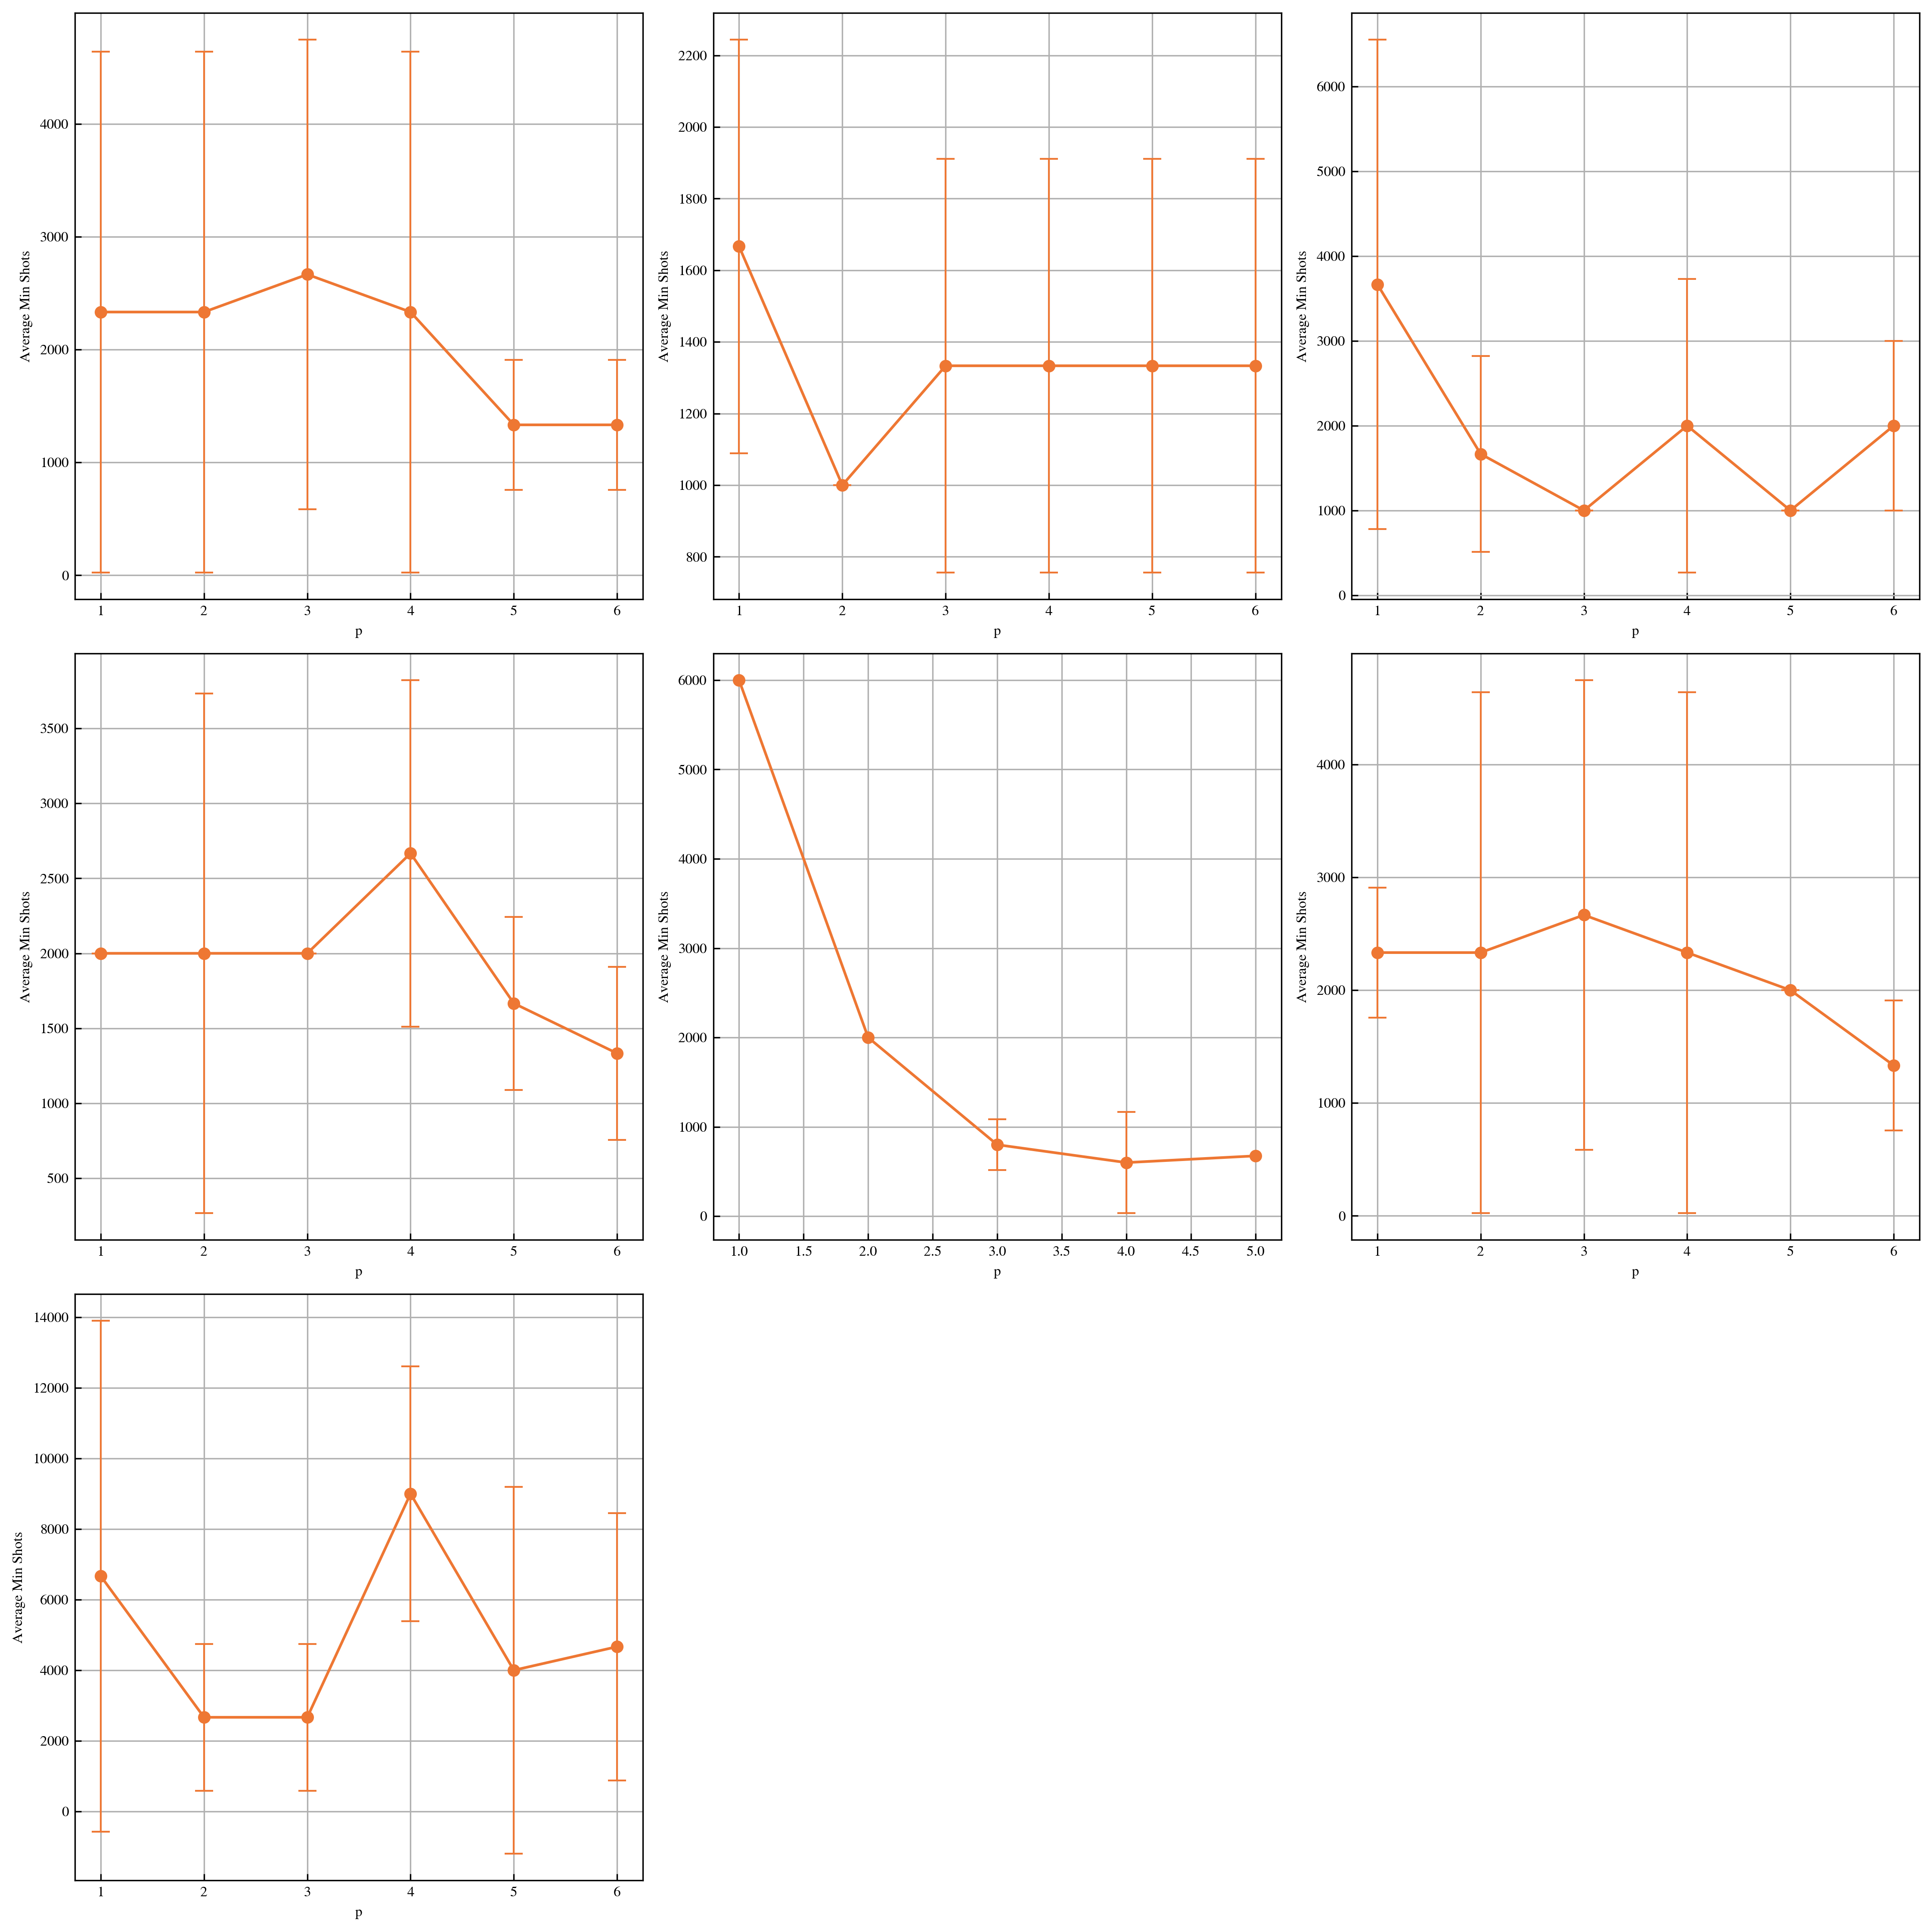

In [29]:
plotter.plot_p_vs_min_shots_per_structure_statistics(save_path=PLOT_DIR)

In [21]:
def find_best_efficiency(df):
    df = df.dropna(subset=['min_shots', 'shots'])

    df['efficiency'] = df['shots'] / df['min_shots']

    df_stats = df.groupby(['num_res', 'num_rot', 'p']).agg({
        'min_shots': ['mean', 'std'],
        'shots': ['mean', 'std'],
        'efficiency': ['mean', 'std'],
        'min_iter': ['mean', 'std']
    }).reset_index()

    df_stats.columns = [
        'num_res', 'num_rot', 'p', 
        'min_shots_mean', 'min_shots_std', 
        'shots_mean', 'shots_std', 
        'efficiency_mean', 'efficiency_std', 
        'min_iter_mean', 'min_iter_std'
    ]

    best_efficiency_per_group = df_stats.loc[df_stats.groupby(['num_res', 'num_rot'])['efficiency_mean'].idxmax()]

    return best_efficiency_per_group

best_efficiency_results = find_best_efficiency(df_min_shots_combined)
print(best_efficiency_results)

# gives same output as best combinations in this case but a good check

    num_res  num_rot  p  min_shots_mean  min_shots_std  shots_mean  shots_std  \
0         4        3  1          1000.0            NaN      1000.0        NaN   
8         4        4  3          1000.0            0.0      1000.0        0.0   
15        4        5  3          1000.0            NaN      1000.0        NaN   
18        5        3  2          1000.0            NaN      1000.0        NaN   
24        5        4  2          1000.0            0.0      1000.0        0.0   
31        6        3  2          1000.0            NaN      1000.0        NaN   
38        6        4  3          2000.0            0.0      1000.0        0.0   

    efficiency_mean  efficiency_std  min_iter_mean  min_iter_std  
0               1.0             NaN            1.0           NaN  
8               1.0             0.0            1.0           0.0  
15              1.0             NaN            1.0           NaN  
18              1.0             NaN            1.0           NaN  
24              

In [22]:
print(df_min_shots_combined[df_min_shots_combined['p'] == 2])


    num_res  num_rot  num_qubits  alpha  p  min_iter  shots  min_shots  \
1         4        4          16    0.2  2         1   1000       1000   
8         5        4          20    0.2  2         1   1000       1000   
15        6        4          24    0.2  2         9   1000       9000   
18        4        3          12    0.2  2         1   1000       1000   
24        5        3          15    0.2  2         1   1000       1000   
30        4        4          16    0.2  2         3   1000       3000   
36        6        3          18    0.2  2         1   1000       1000   
43        4        5          20    0.2  2         2   1000       2000   
44        5        4          20    0.2  2         1   1000       1000   
52        6        4          24    0.2  2         2   1000       2000   

   simulation_id  
1        A120221  
8        A120221  
15       A120221  
18       A124099  
24       A124099  
30       A124099  
36       A124099  
43       A124099  
44       A1240

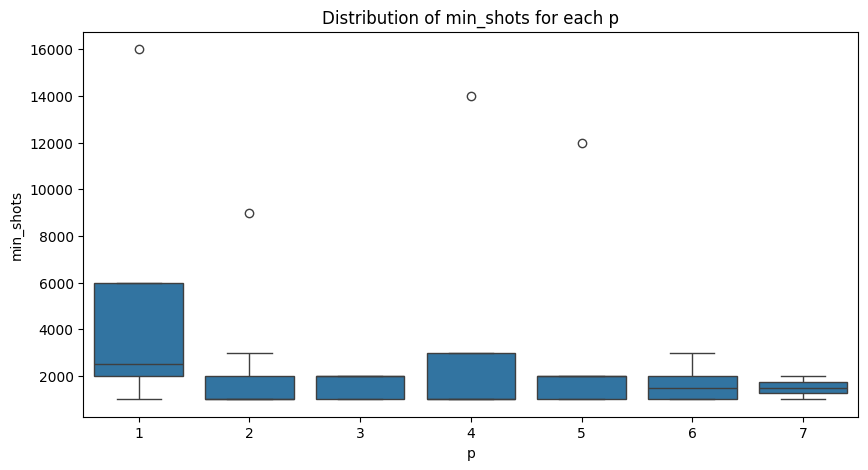

In [23]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x="p", y="min_shots", data=df_min_shots_combined)
plt.title("Distribution of min_shots for each p")
plt.savefig(os.path.join(PLOT_DIR, "distribution_min_shots_per_p.png"))
plt.show()
